<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/resample_naip_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install rasterio

import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 39.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip show GDAL


Name: GDAL
Version: 3.6.4
Summary: GDAL: Geospatial Data Abstraction Library
Home-page: http://www.gdal.org
Author: Frank Warmerdam
Author-email: warmerdam@pobox.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [4]:
import os
from osgeo import gdal

# change the CRS

In [ ]:
# I have to update Oahu and Maui from WGS84 to NAD83 because most of the other tiels are NAD83 and I don't have the time to re-export the others (theres more nad83 than wgs84)

# # Define input and output CRS
# input_crs = 'EPSG:32604'  # WGS 84 / UTM zone 4N
# output_crs = 'EPSG:26904'  # NAD83 / UTM zone 4N

# Directory containing the TIFF files
input_dir = '/content/drive/MyDrive/NAIP/Maui_tif'
output_dir = '/content/drive/MyDrive/NAIP/tiles/NAD83/Maui'

# Loop through all TIFF files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tif"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Open the source dataset
        ds = gdal.Open(input_path)
        if ds is None:
            print(f"Failed to open {input_path}")
            continue

        # Define target SRS to NAD83
        target_srs = 'EPSG:26904'

        # Reproject
        ds_nad83 = gdal.Warp(output_path, ds, dstSRS=target_srs)

        # Close datasets
        ds_nad83 = None
        ds = None
        print(f"Reprojected {filename} to {target_srs}")

print("Reprojection complete.")

# check the projection of files

In [20]:
# check the projection
# Path to your TIFF file (adjust as needed)
file_path = '/content/drive/MyDrive/data/wetland_project/preprocessed_data/planet_processing/KawainuiMarsh_2021/2021-06-27_strip_4753025_composite.tif'

# Open the dataset
dataset = gdal.Open(file_path)

# Check if the dataset was successfully opened
if not dataset:
    print("Unable to open file")
else:
    # Get projection information
    projection = dataset.GetProjection()
    print("Projection Info:\n", projection)

    # Close the dataset
    dataset = None


Projection Info:
 PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32604"]]


# rename tif names from a directory

In [ ]:
# Define the directory containing your files
directory = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/'

# Iterate through all files in the directory
for filename in os.listdir(directory):
    # Check if the file name matches the format 'naip_*.tif'
    if filename.startswith('resampled_') and filename.endswith('.tif'):
        # Construct the full file path
        old_file = os.path.join(directory, filename)

        # Create the new file name by replacing 'naip_' with '2017_'
        new_filename = filename.replace('resampled_', ' ')
        new_file = os.path.join(directory, new_filename)

        # Rename the file
        os.rename(old_file, new_file)
        print(f'Renamed {filename} to {new_filename}')


check the 2017 vs 2022 files NAIP

In [45]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import pandas as pd

# Define the directories for 2017 and 2022 files
dir_2017 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017/'
dir_2022 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/'

# Initialize a list to store file information
file_info = []


# Function to extract file properties (with location)
def extract_file_properties(directory, year):
    for filename in os.listdir(directory):
        if filename.endswith('.tif'):
            # Extract the location name from the filename
            location = filename.split('_')[1].split('.')[0]
            file_path = os.path.join(directory, filename)
            with rasterio.open(file_path) as src:
                shape = src.shape
                bands = src.count
                size = os.path.getsize(file_path)
                file_info.append([year, location, filename, shape, bands, size])

# Function to extract file properties
# def extract_file_properties(directory, year):
#     for filename in os.listdir(directory):
#         if filename.endswith('.tif'):
#             file_path = os.path.join(directory, filename)
#             with rasterio.open(file_path) as src:
#                 shape = src.shape
#                 bands = src.count
#                 size = os.path.getsize(file_path)
#                 file_info.append([year,filename, shape, bands, size])

# Extract properties for files in 2017 and 2022 directories
extract_file_properties(dir_2017, 2017)
extract_file_properties(dir_2022, 2022)


# Convert the list to a DataFrame for easy viewing (with location)
df = pd.DataFrame(file_info, columns=['Year', 'Location', 'Filename', 'Shape', 'Bands', 'Size (bytes)'])

# Pivot the DataFrame to compare files side by side (with location)
pivot_df = df.pivot(index='Location', columns='Year', values=['Filename', 'Shape', 'Bands', 'Size (bytes)'])

# Display the pivoted DataFrame (with location)
print(pivot_df)





# # Convert the list to a DataFrame for easy viewing
# df = pd.DataFrame(file_info, columns=['Year', 'Filename', 'Shape', 'Bands', 'Size (bytes)'])

# # Display the DataFrame
# print(df)

# Compare two specific files visually
file_2017 = os.path.join(dir_2017, '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017/2017_anahola.tif')
file_2022 = os.path.join(dir_2022, '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/2022_anahola.tif')

# Read and plot the images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

with rasterio.open(file_2017) as src_2017:
    show(src_2017, ax=ax1)
    ax1.set_title('2017')

with rasterio.open(file_2022) as src_2022:
    show(src_2022, ax=ax2)
    ax2.set_title('2022')

plt.show()



ValueError: Index contains duplicate entries, cannot reshape

# Attempt to upsample 2017 naip from 0.3m to 0.6m to match the 2022 data

In [57]:
from rasterio.enums import Resampling

# Path to the 2017 data
input_file = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017/2017_kawainui_marsh.tif'
# Path to save the upsampled 2017 data
output_file = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/ 2022_kawainui_marsh.tif'

# Open the original 2017 data
with rasterio.open(input_file) as dataset:

    # Calculate the new dimensions
    new_width = int(dataset.width / 2)
    new_height = int(dataset.height / 2)

    # Update the transform for the new dimensions
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / new_width),
        (dataset.height / new_height)
    )

    # Set the new profile
    profile = dataset.profile
    profile.update(transform=transform, driver='GTiff',
                   height=new_height, width=new_width)

    # Read and resample the data
    data = dataset.read(
        out_shape=(dataset.count, new_height, new_width),
        resampling=Resampling.bilinear
    )

    # Write the upsampled data to a new file
    with rasterio.open(output_file, 'w', **profile) as dest:
        dest.write(data)

print(f"Resampled file saved to {output_file}")


Resampled file saved to /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/ 2022_kawainui_marsh.tif


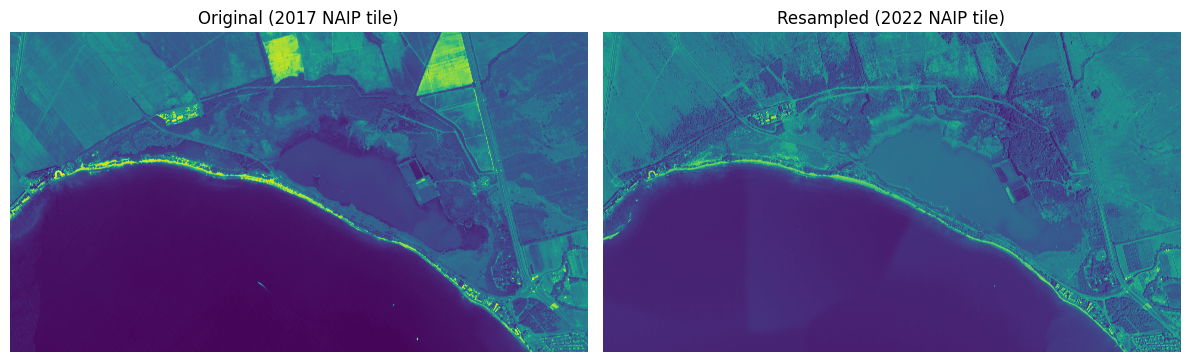

Original File Properties:
Dimensions: 13705 x 7595
Resolution: 0.4m x 0.4m
Number of Bands: 3

Resampled File Properties:
Dimensions: 13705 x 7595
Resolution: 0.4m x 0.4m
Number of Bands: 3


In [61]:
# Paths to the original and resampled files
original_file = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017/2017_kealia.tif'
resampled_file = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/ 2022_kealia.tif'

# Function to read and plot a raster file
def plot_raster(file_path, title, ax):
    with rasterio.open(file_path) as src:
        # Read the first band
        band1 = src.read(1)
        # Plotting
        show = ax.imshow(band1, cmap='viridis')
        ax.set_title(title)
        ax.axis('off')
    return src

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original file
src_original = plot_raster(original_file, 'Original (2017 NAIP tile)', axes[0])

# Plot the resampled file
src_resampled = plot_raster(resampled_file, 'Resampled (2022 NAIP tile)', axes[1])

# Show plots
plt.tight_layout()
plt.show()

# Compare the properties of the two files
print("Original File Properties:")
print(f"Dimensions: {src_original.width} x {src_original.height}")
print(f"Resolution: {src_original.res[0]}m x {src_original.res[1]}m")
print(f"Number of Bands: {src_original.count}")

print("\nResampled File Properties:")
print(f"Dimensions: {src_resampled.width} x {src_resampled.height}")
print(f"Resolution: {src_resampled.res[0]}m x {src_resampled.res[1]}m")
print(f"Number of Bands: {src_resampled.count}")

In [59]:
import os
import rasterio
from rasterio.enums import Resampling

# Directories for the 2017 and 2022 files, and output directory for resampled files
dir_2017 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017/'
dir_2022 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_original/'
out_2022 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/'

# Function to resample a file to match the resolution of another file
def resample_to_match(file_to_resample, reference_file, output_file):
    with rasterio.open(file_to_resample) as src, rasterio.open(reference_file) as ref:
        # Calculate new transform and dimensions to match reference file resolution
        new_transform = rasterio.transform.from_origin(ref.bounds.left, ref.bounds.top, ref.res[0], ref.res[1])
        new_width = int(round((ref.bounds.right - ref.bounds.left) / ref.res[0]))
        new_height = int(round((ref.bounds.top - ref.bounds.bottom) / ref.res[1]))

        # Set the new profile
        profile = src.profile
        profile.update(transform=new_transform, driver='GTiff',
                       height=new_height, width=new_width,
                       res=(ref.res[0], ref.res[1]))

        # Read and resample the data
        data = src.read(
            out_shape=(src.count, new_height, new_width),
            resampling=Resampling.bilinear
        )

        # Write the resampled data to a new file
        with rasterio.open(output_file, 'w', **profile) as dest:
            dest.write(data)

# Ensure the output directory exists
os.makedirs(out_2022, exist_ok=True)

# Iterate through files in the 2022 directory and resample them to match the corresponding 2017 files
for filename_2022 in os.listdir(dir_2022):
    if filename_2022.endswith('.tif'):
        # Construct the corresponding 2017 filename
        filename_2017 = filename_2022.replace('2022', '2017')
        file_2022 = os.path.join(dir_2022, filename_2022)
        file_2017 = os.path.join(dir_2017, filename_2017)
        output_file = os.path.join(out_2022, 'resampled_' + filename_2022)

        # Check if the corresponding 2017 file exists
        if os.path.exists(file_2017):
            # Resample the 2022 file to match the 2017 file
            resample_to_match(file_2022, file_2017, output_file)
            print(f'Resampled {filename_2022} to match {filename_2017} and saved as {output_file}')
        else:
            print(f'No corresponding file found for {filename_2022} in 2017 data.')


Resampled 2022_anahola.tif to match 2017_anahola.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_anahola.tif


Resampled 2022_hanalei.tif to match 2017_hanalei.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_hanalei.tif


Resampled 2022_huleia.tif to match 2017_huleia.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_huleia.tif


Resampled 2022_lumahai.tif to match 2017_lumahai.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_lumahai.tif


Resampled 2022_wailua_opaekaa.tif to match 2017_wailua_opaekaa.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_wailua_opaekaa.tif


Resampled 2022_haleiwa.tif to match 2017_haleiwa.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_haleiwa.tif


Resampled 2022_kahuku.tif to match 2017_kahuku.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_kahuku.tif


Resampled 2022_kawainui_marsh.tif to match 2017_kawainui_marsh.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_kawainui_marsh.tif


Resampled 2022_pearl_harbor.tif to match 2017_pearl_harbor.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_pearl_harbor.tif


Resampled 2022_kakahaia.tif to match 2017_kakahaia.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_kakahaia.tif


Resampled 2022_kaluaapuhi.tif to match 2017_kaluaapuhi.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_kaluaapuhi.tif


Resampled 2022_kamalo.tif to match 2017_kamalo.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_kamalo.tif


Resampled 2022_kanaha.tif to match 2017_kanaha.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_kanaha.tif


Resampled 2022_kealia.tif to match 2017_kealia.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_kealia.tif


Resampled 2022_paukukalo.tif to match 2017_paukukalo.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_paukukalo.tif


Resampled 2022_waihee.tif to match 2017_waihee.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_waihee.tif


Resampled 2022_lokoaka_kionakapahu.tif to match 2017_lokoaka_kionakapahu.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_lokoaka_kionakapahu.tif


Resampled 2022_pololu.tif to match 2017_pololu.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_pololu.tif


Resampled 2022_waimanu.tif to match 2017_waimanu.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_waimanu.tif


Resampled 2022_waipio.tif to match 2017_waipio.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/resampled_2022_waipio.tif


In [ ]:
import os
import rasterio
from rasterio.enums import Resampling

# Directories for the 2017 and 2022 files
dir_2017 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017/'
dir_2022 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/'
out_2017 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017_upsample/'




# Function to resample a file to match the resolution of another file
def resample_to_match(file_to_resample, reference_file, output_file):
    with rasterio.open(file_to_resample) as src, rasterio.open(reference_file) as ref:
        # Calculate the scaling factors
        scale_x = ref.width / src.width
        scale_y = ref.height / src.height

        # Update the transform for the new dimensions
        transform = src.transform * src.transform.scale(scale_x, scale_y)

        # Set the new profile
        profile = src.profile
        profile.update(transform=transform, driver='GTiff',
                       height=ref.height, width=ref.width)

        # Read and resample the data
        data = src.read(
            out_shape=(src.count, ref.height, ref.width),
            resampling=Resampling.bilinear
        )

        # Write the resampled data to a new file
        with rasterio.open(output_file, 'w', **profile) as dest:
            dest.write(data)

# Iterate through files in the 2017 directory
for filename_2017 in os.listdir(dir_2017):
    if filename_2017.endswith('.tif'):
        # Construct the corresponding 2022 filename
        filename_2022 = filename_2017.replace('2017', '2022')
        file_2017 = os.path.join(dir_2017, filename_2017)
        file_2022 = os.path.join(dir_2022, filename_2022)
        output_file = os.path.join(out_2017, 'resampled_' + filename_2017) # out_2017 was

        # Check if the corresponding 2022 file exists
        if os.path.exists(file_2022):
            # Resample the 2017 file to match the 2022 file
            resample_to_match(file_2017, file_2022, output_file)
            print(f'Resampled {filename_2017} to match {filename_2022} and saved as {output_file}')
        else:
            print(f'No corresponding file found for {filename_2017} in 2022 data.')


In [36]:
import os
import rasterio
from rasterio.enums import Resampling

# Directories for the 2017 and 2022 files, and output directory for resampled files
dir_2017 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017/'
dir_2022 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/'
out_2022 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/'

# Function to resample a file to match the resolution of another file
def resample_to_match(file_to_resample, reference_file, output_file):
    with rasterio.open(file_to_resample) as src, rasterio.open(reference_file) as ref:
        # Calculate the scaling factors
        scale_x = ref.width / src.width
        scale_y = ref.height / src.height

        # Update the transform for the new dimensions
        transform = src.transform * src.transform.scale(scale_x, scale_y)

        # Set the new profile
        profile = src.profile
        profile.update(transform=transform, driver='GTiff',
                       height=ref.height, width=ref.width)

        # Read and resample the data
        data = src.read(
            out_shape=(src.count, ref.height, ref.width),
            resampling=Resampling.bilinear
        )

        # Write the resampled data to a new file
        with rasterio.open(output_file, 'w', **profile) as dest:
            dest.write(data)

# Iterate through files in the 2022 directory and resample them to match the corresponding 2017 files
for filename_2022 in os.listdir(dir_2022):
    if filename_2022.endswith('.tif'):
        # Construct the corresponding 2017 filename
        filename_2017 = filename_2022.replace('2022', '2017')
        file_2022 = os.path.join(dir_2022, filename_2022)
        file_2017 = os.path.join(dir_2017, filename_2017)
        output_file = os.path.join(out_2022, 'resampled_' + filename_2022)

        # Check if the corresponding 2017 file exists
        if os.path.exists(file_2017):
            # Resample the 2022 file to match the 2017 file
            resample_to_match(file_2022, file_2017, output_file)
            print(f'Resampled {filename_2022} to match {filename_2017} and saved as {output_file}')
        else:
            print(f'No corresponding file found for {filename_2022} in 2017 data.')


Resampled 2022_anahola.tif to match 2017_anahola.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/resampled_2022_anahola.tif
Resampled 2022_hanalei.tif to match 2017_hanalei.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/resampled_2022_hanalei.tif
Resampled 2022_huleia.tif to match 2017_huleia.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/resampled_2022_huleia.tif
Resampled 2022_lumahai.tif to match 2017_lumahai.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/resampled_2022_lumahai.tif
Resampled 2022_wailua_opaekaa.tif to match 2017_wailua_opaekaa.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/resampled_2022_wailua_opaekaa.tif
Resampled 2022_haleiwa.tif to match 2017_haleiwa.tif and saved as /content/drive/MyDrive/data/wetland_project/raw_data/naip_til

    Year                                Filename           Shape  Bands  \
0   2017                        2022_anahola.tif    (3747, 4588)      3   
1   2017                        2022_hanalei.tif   (9419, 11686)      3   
2   2017                         2022_huleia.tif    (4218, 6841)      3   
3   2017                        2022_lumahai.tif    (7698, 2689)      3   
4   2017                 2022_wailua_opaekaa.tif    (5143, 5950)      3   
5   2017                        2022_haleiwa.tif   (12260, 9419)      3   
6   2017                         2022_kahuku.tif   (7602, 11149)      3   
7   2017                 2022_kawainui_marsh.tif   (11444, 9909)      3   
8   2017                   2022_pearl_harbor.tif  (12515, 19604)      3   
9   2017                       2022_kakahaia.tif   (3055, 10126)      3   
10  2017                     2022_kaluaapuhi.tif   (6279, 16322)      3   
11  2017                         2022_kamalo.tif    (2842, 6788)      3   
12  2017                 

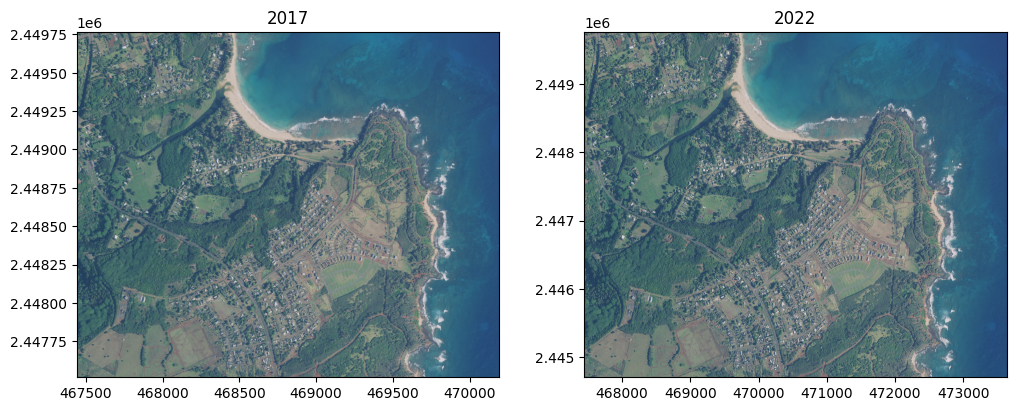

In [40]:
# Define the directories for 2017 and 2022 files
dir_2017 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/'
dir_2022 = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/'

# Initialize a list to store file information
file_info = []


# # Function to extract file properties (with location)
# def extract_file_properties(directory, year):
#     for filename in os.listdir(directory):
#         if filename.endswith('.tif'):
#             # Extract the location name from the filename
#             location = filename.split('_')[1].split('.')[0]
#             file_path = os.path.join(directory, filename)
#             with rasterio.open(file_path) as src:
#                 shape = src.shape
#                 bands = src.count
#                 size = os.path.getsize(file_path)
#                 file_info.append([year, location, filename, shape, bands, size])

# Function to extract file properties
def extract_file_properties(directory, year):
    for filename in os.listdir(directory):
        if filename.endswith('.tif'):
            file_path = os.path.join(directory, filename)
            with rasterio.open(file_path) as src:
                shape = src.shape
                bands = src.count
                size = os.path.getsize(file_path)
                file_info.append([year,filename, shape, bands, size])

# Extract properties for files in 2017 and 2022 directories
extract_file_properties(dir_2017, 2017)
extract_file_properties(dir_2022, 2022)


# # Convert the list to a DataFrame for easy viewing (with location)
# df = pd.DataFrame(file_info, columns=['Year', 'Location', 'Filename', 'Shape', 'Bands', 'Size (bytes)'])

# # Pivot the DataFrame to compare files side by side (with location)
# pivot_df = df.pivot(index='Location', columns='Year', values=['Filename', 'Shape', 'Bands', 'Size (bytes)'])

# # Display the pivoted DataFrame (with location)
# print(pivot_df)





# Convert the list to a DataFrame for easy viewing
df = pd.DataFrame(file_info, columns=['Year', 'Filename', 'Shape', 'Bands', 'Size (bytes)'])

# Display the DataFrame
print(df)

# Compare two specific files visually
file_2017 = os.path.join(dir_2017, '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022/2022_anahola.tif')
file_2022 = os.path.join(dir_2022, '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022_resample/resampled_2022_anahola.tif')

# Read and plot the images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

with rasterio.open(file_2017) as src_2017:
    show(src_2017, ax=ax1)
    ax1.set_title('2017')

with rasterio.open(file_2022) as src_2022:
    show(src_2022, ax=ax2)
    ax2.set_title('2022')

plt.show()


# Rename the tif files based on their spatial extent.
  

In [ ]:
# rename the files based on their spatial extent


# Directory containing the TIFF files
input_dir = '/content/drive/MyDrive/NAIP/tiles/NAD83/Oahu'

# Loop through all TIFF files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tif"):
        file_path = os.path.join(input_dir, filename)

        # Open the dataset
        ds = gdal.Open(file_path)
        if ds is None:
            print(f"Failed to open {file_path}")
            continue

        # Get geotransform and compute lower left coordinates
        gt = ds.GetGeoTransform()
        x_min = gt[0]
        y_min = gt[3] + (gt[5] * ds.RasterYSize)

        # Format new name using first 4 numbers of lower left coordinates
        new_name = f"{str(x_min)[:4]}_{str(y_min)[:4]}.tif"
        new_path = os.path.join(input_dir, new_name)

        # Rename the file
        os.rename(file_path, new_path)
        print(f"Renamed {filename} to {new_name}")

print("Renaming complete.")

In [ ]:
!pip install pandas


# script for visual inspection of mismatched TIF names

In [ ]:
import matplotlib.pyplot as plt

# Function to display a TIFF file
def display_tiff(path):
    ds = gdal.Open(path)
    if ds is None:
        print(f"Failed to open {path}")
        return
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    plt.imshow(arr, cmap='BrBG')
    plt.title(os.path.basename(path))
    plt.colorbar()
    plt.show()

# Directories containing the TIFF files
general_tif_dir = '/content/drive/MyDrive/NAIP/tiles/NAD83/Oahu'
land_cover_tif_dir = '/content/drive/MyDrive/data/ccap/oahu'

# List filenames in each directory
general_tif_files = [f for f in os.listdir(general_tif_dir) if f.endswith('.tif')]
land_cover_tif_files = [f for f in os.listdir(land_cover_tif_dir) if f.endswith('.tif')]

# Compare and display mismatched files
for general_tif in general_tif_files:
    if general_tif not in land_cover_tif_files:
        print(f"Mismatch found: {general_tif}")
        general_path = os.path.join(general_tif_dir, general_tif)
        land_cover_path = os.path.join(land_cover_tif_dir, general_tif)  # Assuming the same name exists
        print("General TIF:")
        display_tiff(general_path)
        print("Land Cover TIF:")
        display_tiff(land_cover_path)


In [ ]:

# Directories containing the TIFF files
general_tif_dir = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2017'
land_cover_tif_dir = '/content/drive/MyDrive/data/wetland_project/raw_data/naip_tiles/2022'

# List filenames in each directory
general_tif_files = sorted([f for f in os.listdir(general_tif_dir) if f.endswith('.tif')])
land_cover_tif_files = sorted([f for f in os.listdir(land_cover_tif_dir) if f.endswith('.tif')])

# Create DataFrames
df_general = pd.DataFrame({'General_TIF': general_tif_files})
df_land_cover = pd.DataFrame({'Land_Cover_TIF': land_cover_tif_files})

# Merge DataFrames on filenames
df_merged = pd.merge(df_general, df_land_cover, left_on='General_TIF', right_on='Land_Cover_TIF', how='outer')

# Add a column to show if names match
df_merged['Names_Match'] = df_merged['General_TIF'] == df_merged['Land_Cover_TIF']

# Display the DataFrame
print(df_merged)


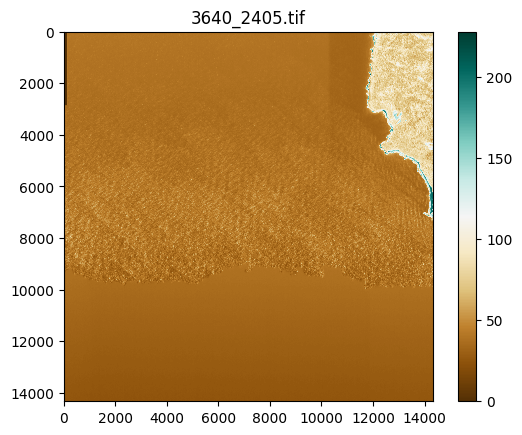

In [ ]:
display_tiff('/content/drive/MyDrive/NAIP/tiles/NAD83/niihau/3640_2405.tif')

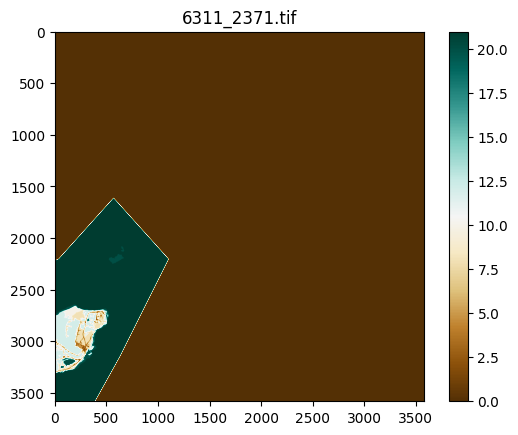

In [ ]:
display_tiff('/content/drive/MyDrive/data/ccap/oahu/6311_2371.tif')